In [2]:
from google.colab import files

uploaded = files.upload()

Saving zomato.csv to zomato.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('zomato.csv',encoding='unicode_escape')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

##1)	Merge the country sheet and Zomato file to get the country code


In [6]:
uploaded_country_codes = files.upload()
df_country = pd.read_excel('Country-Code.xlsx')

df_merged = pd.merge(df, df_country, on='Country Code', how='left')
df_merged.head()

Saving Country-Code.xlsx to Country-Code.xlsx


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## 2)	Get the Top rated restaurants in each city in India(On the basis of rating and votes).


In [7]:
df_india = df_merged[df_merged['Country'] == 'India'].copy()

df_india['Aggregate rating'] = pd.to_numeric(df_india['Aggregate rating'], errors='coerce')
df_india['Votes'] = pd.to_numeric(df_india['Votes'], errors='coerce')

df_india.dropna(subset=['Aggregate rating', 'Votes'], inplace=True)

top_restaurants_per_city = df_india.sort_values(by=['City', 'Aggregate rating', 'Votes'], ascending=[True, False, False])

top_restaurants_in_each_city = top_restaurants_per_city.groupby('City').head(1)

print("Top Rated Restaurants in each city in India:")
print(top_restaurants_in_each_city[['City', 'Restaurant Name', 'Aggregate rating', 'Votes']])

Top Rated Restaurants in each city in India:
              City                    Restaurant Name  Aggregate rating  Votes
637           Agra                    Sheroes Hangout               4.9     77
653      Ahmedabad                           Cryo Lab               4.6    166
680      Allahabad                             Eat On               3.7    105
702       Amritsar                    Kesar Da Dhabha               4.1    878
720     Aurangabad                    Bhoj Restaurant               3.7     89
728      Bangalore                               Toit               4.8  10934
748         Bhopal              Sagar Gaire Fast Food               4.9    427
768   Bhubaneshwar                    Barbeque Nation               4.6    154
793     Chandigarh                    Barbeque Nation               4.5   1450
822        Chennai          AB's - Absolute Barbecues               4.9    859
841     Coimbatore                            CakeBee               4.9    200
850    

## 3)	Finding out relationship between the rating and votes.


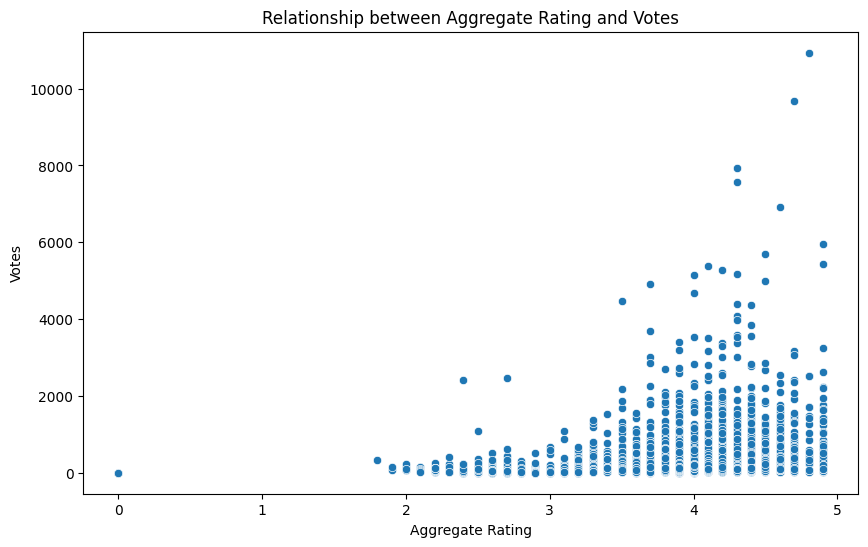


Correlation between Aggregate Rating and Votes: 0.31


In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df_merged)
plt.title('Relationship between Aggregate Rating and Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.show()

correlation = df_merged['Aggregate rating'].corr(df_merged['Votes'])
print(f"\nCorrelation between Aggregate Rating and Votes: {correlation:.2f}")

## 4)	No of Restaurants in each country.



Number of Restaurants in each Country:
           Country  Number of Restaurants
0            India                   8652
1    United States                    434
2   United Kingdom                     80
3           Brazil                     60
4     South Africa                     60
5              UAE                     60
6      New Zealand                     40
7           Turkey                     34
8        Australia                     24
9      Phillipines                     22
10       Indonesia                     21
11           Qatar                     20
12       Singapore                     20
13       Sri Lanka                     20
14          Canada                      4


<ipython-input-9-ff01761c4133>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Restaurants', y='Country', data=restaurant_counts.head(10), palette='viridis')


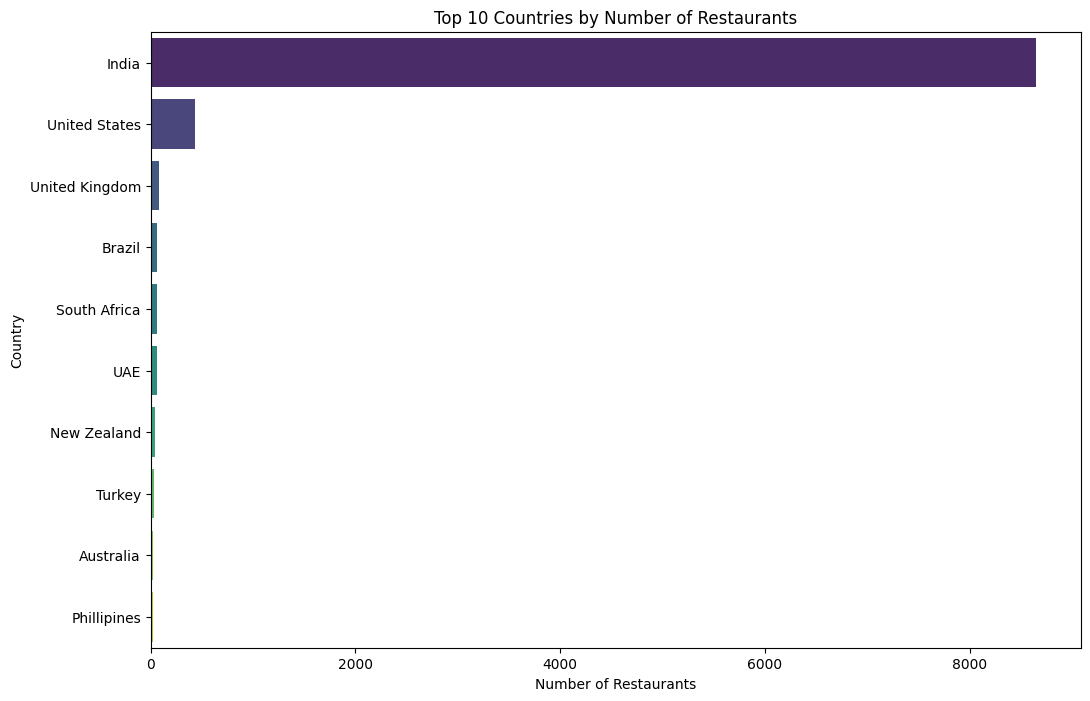

In [9]:
restaurant_counts = df_merged['Country'].value_counts().reset_index()
restaurant_counts.columns = ['Country', 'Number of Restaurants']
print("\nNumber of Restaurants in each Country:")
print(restaurant_counts)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Restaurants', y='Country', data=restaurant_counts.head(10), palette='viridis')
plt.title('Top 10 Countries by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country')
plt.show()

## 5)	Top 5 restaurants with online delivery

In [10]:
df_online_delivery = df_merged[df_merged['Has Online delivery'] == 'Yes'].copy()

df_online_delivery['Aggregate rating'] = pd.to_numeric(df_online_delivery['Aggregate rating'], errors='coerce')
df_online_delivery['Votes'] = pd.to_numeric(df_online_delivery['Votes'], errors='coerce')

df_online_delivery.dropna(subset=['Aggregate rating', 'Votes'], inplace=True)

top_5_online_delivery = df_online_delivery.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False]).head(5)

print("\nTop 5 Restaurants with Online Delivery:")
print(top_5_online_delivery[['Restaurant Name', 'City', 'Country', 'Aggregate rating', 'Votes']])


Top 5 Restaurants with Online Delivery:
                    Restaurant Name        City Country  Aggregate rating  \
3013             Naturals Ice Cream   New Delhi   India               4.9   
2350  Zolocrust - Hotel Clarks Amer      Jaipur   India               4.9   
1381                    Caterspoint     Gurgaon   India               4.9   
841                         CakeBee  Coimbatore   India               4.9   
809                         Chili's     Chennai   India               4.8   

      Votes  
3013   2620  
2350    322  
1381    223  
841     200  
809    1262  


In [11]:
unique_india_cities_count = df_india['City'].nunique()
print(f"\nUnique number of cities in India with restaurants in the dataset: {unique_india_cities_count}")


Unique number of cities in India with restaurants in the dataset: 43


##6) cheap but best restaurants available in a city


In [12]:
def find_cheap_best_restaurants(df, city_name, budget_range=None, min_rating=4.0, min_votes=50):
    df_city = df[df['City'] == city_name].copy()

    df_city['Aggregate rating'] = pd.to_numeric(df_city['Aggregate rating'], errors='coerce')
    df_city['Votes'] = pd.to_numeric(df_city['Votes'], errors='coerce')
    df_city['Average Cost for two'] = pd.to_numeric(df_city['Average Cost for two'], errors='coerce')

    df_city.dropna(subset=['Aggregate rating', 'Votes', 'Average Cost for two'], inplace=True)

    df_filtered = df_city[(df_city['Aggregate rating'] >= min_rating) & (df_city['Votes'] >= min_votes)].copy()

    if budget_range:
        min_cost, max_cost = budget_range
        df_filtered = df_filtered[(df_filtered['Average Cost for two'] >= min_cost) & (df_filtered['Average Cost for two'] <= max_cost)].copy()

    df_cheap_best = df_filtered.sort_values(by='Average Cost for two', ascending=True)

    return df_cheap_best[['Restaurant Name', 'City', 'Average Cost for two', 'Aggregate rating', 'Votes', 'Cuisines']]

city_of_interest = 'New Delhi'
budget = (500, 1500)

cheap_best_restaurants = find_cheap_best_restaurants(df_merged, city_of_interest, budget_range=budget)

print(f"\nCheap but Best Restaurants in {city_of_interest} (Avg Cost for Two between {budget[0]} and {budget[1]} INR):")
if not cheap_best_restaurants.empty:
    print(cheap_best_restaurants)
else:
    print("No restaurants found meeting the criteria.")


Cheap but Best Restaurants in New Delhi (Avg Cost for Two between 500 and 1500 INR):
                                 Restaurant Name       City  \
3110                             Saravana Bhavan  New Delhi   
3181  Delhi 6 - Royal Cuisine Of The Walled City  New Delhi   
4320                             Saravana Bhavan  New Delhi   
4082                               Sweet Tickles  New Delhi   
3998                                   Naivedyam  New Delhi   
...                                          ...        ...   
6145                                    Havemore  New Delhi   
4638                                   Big Chill  New Delhi   
3114                               The G.T. Road  New Delhi   
7083                        Elma's at Good Earth  New Delhi   
7544           The Tea Lounge - Taj Palace Hotel  New Delhi   

      Average Cost for two  Aggregate rating  Votes  \
3110                   500               4.3   5172   
3181                   500               4.1   

##7) Top cuisines in each region.


In [13]:
df_merged['Cuisines'] = df_merged['Cuisines'].astype(str)

top_cuisines_by_country = df_merged.groupby('Country')['Cuisines'].apply(lambda x: x.value_counts().nlargest(1)).reset_index()
top_cuisines_by_country.columns = ['Country', 'level_1', 'Count']
top_cuisines_by_country = top_cuisines_by_country.rename(columns={'level_1': 'Top Cuisine'})

print("\nTop Cuisine in Each Country:")
print(top_cuisines_by_country)

def get_top_n_cuisines(series, n=3):
    return series.value_counts().nlargest(n).index.tolist()

top_n_cuisines_by_country = df_merged.groupby('Country')['Cuisines'].apply(lambda x: get_top_n_cuisines(x, n=3)).reset_index()
top_n_cuisines_by_country.columns = ['Country', 'Top 3 Cuisines']

print("\nTop 3 Cuisines in Each Country:")
top_n_cuisines_by_country


Top Cuisine in Each Country:
           Country        Top Cuisine  Count
0        Australia  Modern Australian      2
1           Brazil          Brazilian      8
2           Canada    Japanese, Sushi      1
3            India       North Indian    936
4        Indonesia  Sunda, Indonesian      3
5      New Zealand               Cafe      5
6      Phillipines           Filipino      3
7            Qatar             Indian      5
8        Singapore             French      2
9     South Africa            Mexican      3
10       Sri Lanka            Chinese      1
11          Turkey               Cafe      6
12             UAE             Indian      5
13  United Kingdom            Italian      7
14   United States            Mexican     25

Top 3 Cuisines in Each Country:


,Country,Top 3 Cuisines
0,Australia,"[Modern Australian, Cafe, Breakfast, Coffee an..."
1,Brazil,"[Brazilian, Italian, Brazilian, Bar Food]"
2,Canada,"[Japanese, Sushi, Chinese, Canadian, Italian, ..."
3,India,"[North Indian, North Indian, Chinese, Fast Food]"
4,Indonesia,"[Sunda, Indonesian, Seafood, Western, Cafe, De..."
5,New Zealand,"[Cafe, American, European]"
6,Phillipines,"[Filipino, Filipino, Mexican, French, Japanese..."
7,Qatar,"[Indian, Pakistani, International]"
8,Singapore,"[French, American, Steak, Chinese, Continental..."
9,South Africa,"[Mexican, Mediterranean, Cafe]"


##8) Aggregate rating of all the restaurants in each city in a country.


In [14]:
df_merged['Aggregate rating'] = pd.to_numeric(df_merged['Aggregate rating'], errors='coerce')

df_merged.dropna(subset=['Aggregate rating'], inplace=True)

aggregate_rating_by_city_country = df_merged.groupby(['Country', 'City'])['Aggregate rating'].mean().reset_index()

print("\nAggregate Rating of Restaurants in Each City within Each Country:")
aggregate_rating_by_city_country


Aggregate Rating of Restaurants in Each City within Each Country:


,Country,City,Aggregate rating
0,Australia,Armidale,3.500
1,Australia,Balingup,3.200
2,Australia,Beechworth,4.600
3,Australia,Dicky Beach,3.600
4,Australia,East Ballina,4.100
...,...,...,...
136,United States,Valdosta,3.715
137,United States,Vernonia,4.300
138,United States,Waterloo,3.650
139,United States,Weirton,3.900


##9) Does rating influences the cost of restaurant? (Draw boxplot for this).


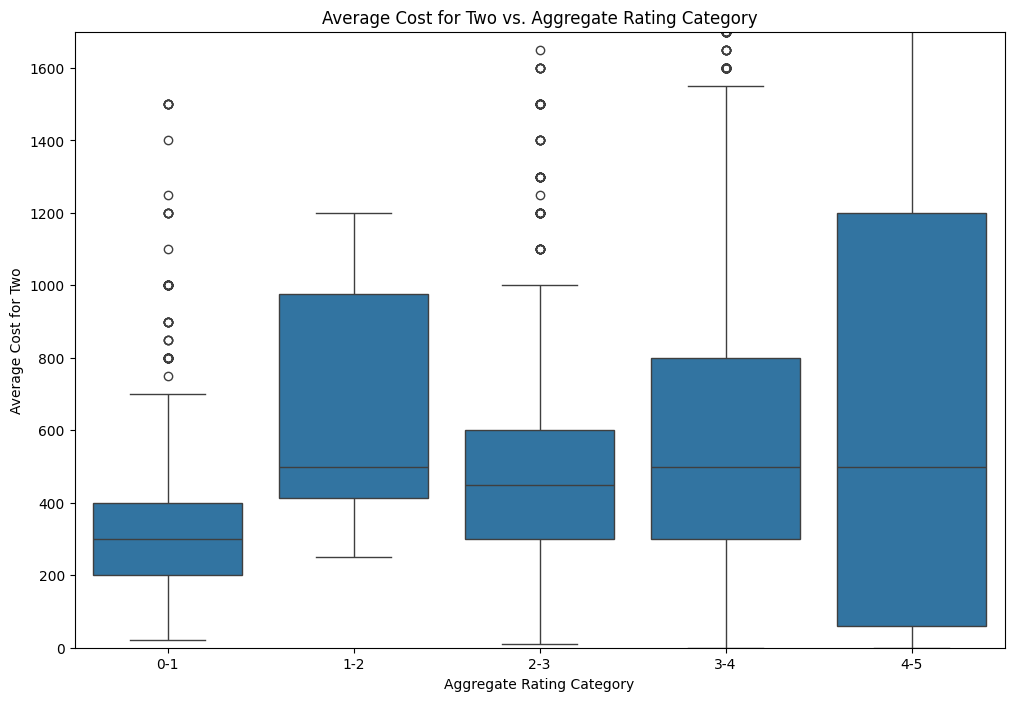


Correlation between Aggregate Rating and Average Cost for Two: 0.05


In [15]:
df_merged['Average Cost for two'] = pd.to_numeric(df_merged['Average Cost for two'], errors='coerce')

df_analysis = df_merged.dropna(subset=['Aggregate rating', 'Average Cost for two']).copy()

bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df_analysis['Rating Category'] = pd.cut(df_analysis['Aggregate rating'], bins=bins, labels=labels, right=True, include_lowest=True)

df_analysis.dropna(subset=['Rating Category'], inplace=True)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Rating Category', y='Average Cost for two', data=df_analysis, order=labels)
plt.title('Average Cost for Two vs. Aggregate Rating Category')
plt.xlabel('Aggregate Rating Category')
plt.ylabel('Average Cost for Two')
plt.ylim(0, df_analysis['Average Cost for two'].quantile(0.95))
plt.show()

correlation_cost_rating = df_analysis['Aggregate rating'].corr(df_analysis['Average Cost for two'])
print(f"\nCorrelation between Aggregate Rating and Average Cost for Two: {correlation_cost_rating:.2f}")

##10 Top Percentage cover of restaurants in a city.(Draw pie graph for this).

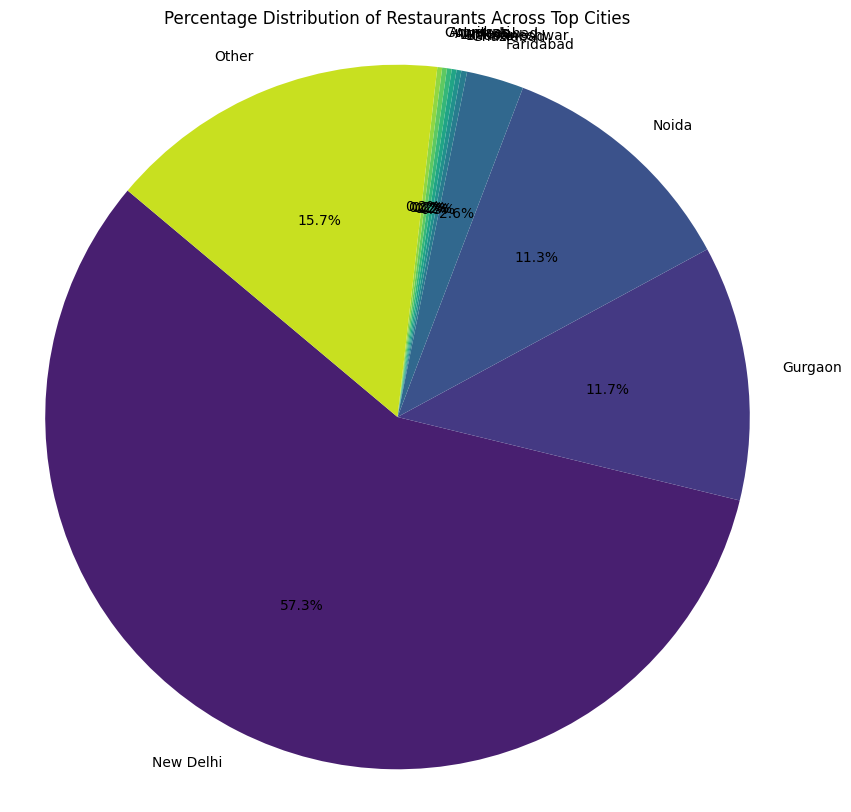


Percentage of Restaurants in Top Cities:
New Delhi       57.302900
Gurgaon         11.705581
Noida           11.307716
Faridabad        2.627997
Ghaziabad        0.261753
Bhubaneshwar     0.219872
Lucknow          0.219872
Ahmedabad        0.219872
Amritsar         0.219872
Guwahati         0.219872
Other           15.694692
dtype: float64


In [16]:
city_counts = df_merged['City'].value_counts()

top_n = 10
if len(city_counts) > top_n:
    top_cities = city_counts.nlargest(top_n)
    other_count = city_counts.sum() - top_cities.sum()
    city_counts_for_plot = top_cities._append(pd.Series([other_count], index=['Other']))
else:
    city_counts_for_plot = city_counts

plt.figure(figsize=(10, 10))
plt.pie(city_counts_for_plot, labels=city_counts_for_plot.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(city_counts_for_plot)))
plt.title('Percentage Distribution of Restaurants Across Top Cities')
plt.axis('equal')
plt.show()

print("\nPercentage of Restaurants in Top Cities:")
print(city_counts_for_plot / city_counts_for_plot.sum() * 100)

##11) Top cuisines in Indian restaurants.( Draw pie graph for this)

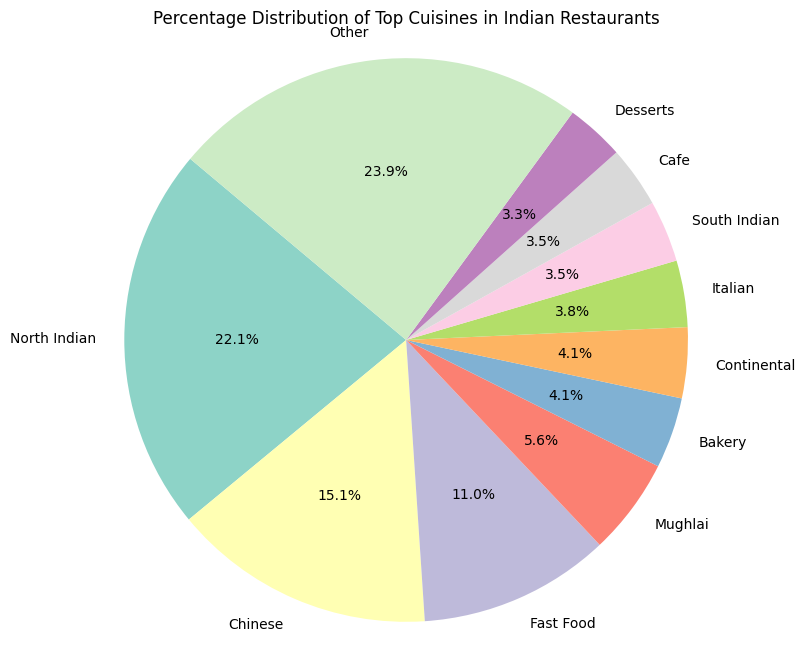


Percentage Distribution of Top Cuisines in Indian Restaurants:
North Indian    22.101490
Chinese         15.066652
Fast Food       10.994735
Mughlai          5.556178
Bakery           4.066316
Continental      4.055114
Italian          3.819872
South Indian     3.534222
Cafe             3.511818
Desserts         3.343789
Other           23.949815
dtype: float64


In [17]:
df_india_cuisines = df_merged[df_merged['Country'] == 'India'].copy()

cuisines_list = df_india_cuisines['Cuisines'].str.split(', ').explode()

cuisine_counts = cuisines_list.value_counts()
top_n_cuisines = 10
if len(cuisine_counts) > top_n_cuisines:
    top_cuisines = cuisine_counts.nlargest(top_n_cuisines)
    other_count = cuisine_counts.sum() - top_cuisines.sum()
    cuisines_for_plot = top_cuisines._append(pd.Series([other_count], index=['Other']))
else:
    cuisines_for_plot = cuisine_counts

plt.figure(figsize=(8, 8))
plt.pie(cuisines_for_plot, labels=cuisines_for_plot.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(cuisines_for_plot)))
plt.title('Percentage Distribution of Top Cuisines in Indian Restaurants')
plt.axis('equal')
plt.show()

print("\nPercentage Distribution of Top Cuisines in Indian Restaurants:")
print(cuisines_for_plot / cuisines_for_plot.sum() * 100)

In [18]:
city_restaurant_counts_india = df_india['City'].value_counts().reset_index()
city_restaurant_counts_india.columns = ['City', 'Number of Restaurants']

top_cities_india = city_restaurant_counts_india.sort_values(by='Number of Restaurants', ascending=False)

print("List of top cities in India with their number of restaurants:")
print(top_cities_india)

List of top cities in India with their number of restaurants:
            City  Number of Restaurants
0      New Delhi                   5473
1        Gurgaon                   1118
2          Noida                   1080
3      Faridabad                    251
4      Ghaziabad                     25
5       Guwahati                     21
6        Lucknow                     21
7   Bhubaneshwar                     21
8      Ahmedabad                     21
9       Amritsar                     21
10     Allahabad                     20
11      Varanasi                     20
12    Coimbatore                     20
13       Chennai                     20
14        Bhopal                     20
15    Aurangabad                     20
16     Bangalore                     20
17          Agra                     20
18           Goa                     20
19       Kolkata                     20
20        Jaipur                     20
21         Kochi                     20
22        Kanpur  

In [34]:
# Top 5 Restaurants with Good Ratings in Noida
df_noida = df_merged[(df_merged['City'] == 'Noida') & (df_merged['Aggregate rating'] >= 4.0)].copy()

df_noida['Aggregate rating'] = pd.to_numeric(df_noida['Aggregate rating'], errors='coerce')
df_noida['Votes'] = pd.to_numeric(df_noida['Votes'], errors='coerce')

df_noida.dropna(subset=['Aggregate rating', 'Votes'], inplace=True)

top_5_noida = df_noida.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False]).head(5)

print("\nTop 5 Restaurants with Good Ratings in Noida:")
if not top_5_noida.empty:
    print(top_5_noida[['Restaurant Name', 'Aggregate rating', 'Votes', 'Cuisines', 'Average Cost for two']])
else:
    print("No restaurants found in Noida with good ratings.")


Top 5 Restaurants with Good Ratings in Noida:
           Restaurant Name  Aggregate rating  Votes  \
8049         Oh So Stoned!               4.5    324   
8050  The Big Chill Cakery               4.5    147   
8394       Barbeque Nation               4.3   1670   
8601             Bistro 37               4.3   1005   
8072              Mamagoto               4.3    428   

                                  Cuisines  Average Cost for two  
8049                              Desserts                   250  
8050                      Bakery, Desserts                   700  
8394  North Indian, Chinese, Mediterranean                  1600  
8601                    Fast Food, Chinese                   400  
8072                  Asian, Thai, Chinese                  1600  


In [28]:
# top 5 restraunt in gurgaon with good ratings

import pandas as pd
df_gurgaon = df_merged[(df_merged['City'] == 'Gurgaon') & (df_merged['Aggregate rating'] >= 4.0)].copy()

df_gurgaon['Aggregate rating'] = pd.to_numeric(df_gurgaon['Aggregate rating'], errors='coerce')
df_gurgaon['Votes'] = pd.to_numeric(df_gurgaon['Votes'], errors='coerce')

df_gurgaon.dropna(subset=['Aggregate rating', 'Votes'], inplace=True)

top_5_gurgaon = df_gurgaon.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False]).head(5)

print("\nTop 5 Restaurants with Good Ratings in Gurgaon:")
if not top_5_gurgaon.empty:
    print(top_5_gurgaon[['Restaurant Name', 'Aggregate rating', 'Votes', 'Cuisines', 'Average Cost for two']])
else:
    print("No restaurants found in Gurgaon with good ratings.")


Top 5 Restaurants with Good Ratings in Gurgaon:
                       Restaurant Name  Aggregate rating  Votes  \
1381                       Caterspoint               4.9    223   
1839                         Prankster               4.8   1478   
1838                          Matchbox               4.8    245   
1837                        feel ALIVE               4.7     69   
1464  Manhattan Brewery & Bar Exchange               4.6   2093   

                                               Cuisines  Average Cost for two  
1381                    Mexican, American, Healthy Food                   500  
1839                        Modern Indian, North Indian                  1500  
1838                 Continental, North Indian, Chinese                  1500  
1837             North Indian, American, Asian, Biryani                  1200  
1464  Finger Food, American, Continental, North Indi...                  2000  


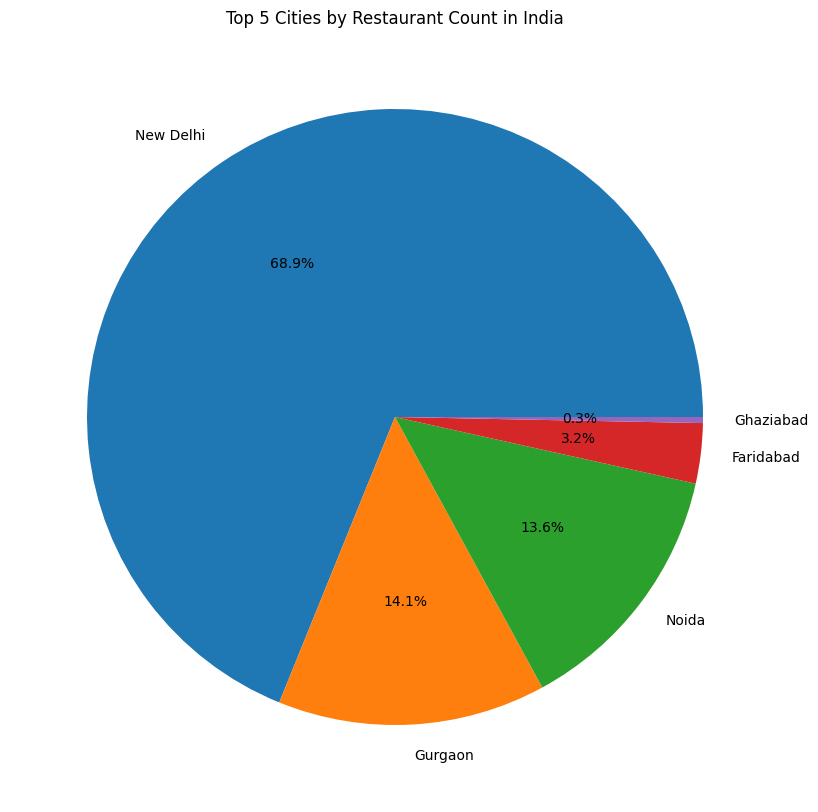

In [31]:
# top 5 cities by restaurant count in india
plt.figure(figsize=(10, 10))
df_india['City'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
plt.title('Top 5 Cities by Restaurant Count in India')
plt.ylabel('')
plt.show()